### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [55]:
ratings_data = pd.read_csv('UserRatingsData-Data.csv')
user_data = pd.read_csv('UserData-user.csv')
item_data = pd.read_csv('MovieData-item.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [56]:
#get the info on the UserRatings Data
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [57]:
#get the shape on the UserRatings data
ratings_data.shape

(100000, 4)

In [58]:
#describe the UserRatings data
ratings_data.describe().T

#possibilty of some outliers in data

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [59]:
#number of missing data in the UserRatings
ratings_data.isna().sum().sum()

#there are no missing data in UserRatings

0

In [60]:
#get the info on the User Data
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [61]:
#get the shape on the User data
user_data.shape

(943, 5)

In [62]:
#describe the User data
user_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [63]:
#number of missing data in the User
user_data.isna().sum().sum()

#there are no missing data in User Data

0

In [11]:
#get the info on the Movie Data
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [64]:
#get the shape on the Movie items
item_data.shape

(1681, 22)

In [13]:
#describe the Movie items data
item_data.describe().T

#lots of categorical data

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [65]:
#number of missing data in the Movie items
item_data.isna().sum().sum()

#no missing data in the Movie Item data

0

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [66]:
new_item_data=item_data[["unknown","Action","Adventure","Animation", "Childrens","Comedy","Crime", "Documentary",
                         "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]]

df = pd.DataFrame({'genre':['unknown','Action','Adventure','Animation', 'Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
                             'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'],'movies per genre':new_item_data.sum(axis=0)})
df.set_index('genre')

#Drama genre appears to have the largest number of movies followed by Comedy

,movies per genre
genre,
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [67]:
new_item_data=new_item_data.drop("unknown", axis=1)
new_item_data.head()
#table below shows that the "unknow" column has been dropped

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [68]:
df_merged = pd.concat([item_data["movie title"], new_item_data], axis=1)
df=df_merged.set_index('movie title').sum(axis=1)
df2 = df[df > 1]
print(df2.head(50))

movie title
Toy Story                            3
GoldenEye                            3
Get Shorty                           3
Copycat                              3
Twelve Monkeys                       2
Babe                                 3
Richard III                          2
Seven (Se7en)                        2
Usual Suspects, The                  2
Postino, Il                          2
French Twist (Gazon maudit)          2
From Dusk Till Dawn                  5
Angels and Insects                   2
Muppet Treasure Island               5
Braveheart                           3
Taxi Driver                          2
Rumble in the Bronx                  3
Apollo 13                            3
Batman Forever                       4
Crimson Tide                         3
Desperado                            3
Doom Generation, The                 2
Free Willy 2: The Adventure Home     3
Mad Love                             2
Net, The                             2
Strange Days 

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


100000


[Text(0, 0.5, 'Percent')]

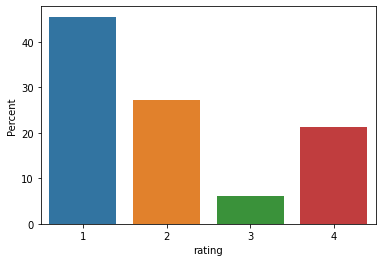

In [69]:
df = ratings_data['rating']
print(len(df))
ax = sns.barplot(x=df, y=df, data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
#plot below shows that the rating of 1 has the highest perentage followed by rating of 2

<AxesSubplot:xlabel='age'>

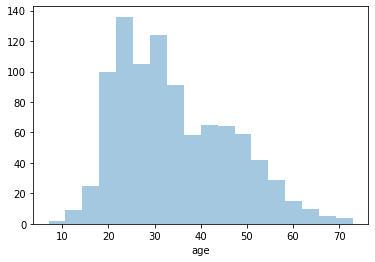

In [70]:
#distplot for age
sns.distplot(user_data['age'], kde=False)
#plot below shows that peak age is approximately 25 years

<AxesSubplot:xlabel='release year', ylabel='count'>

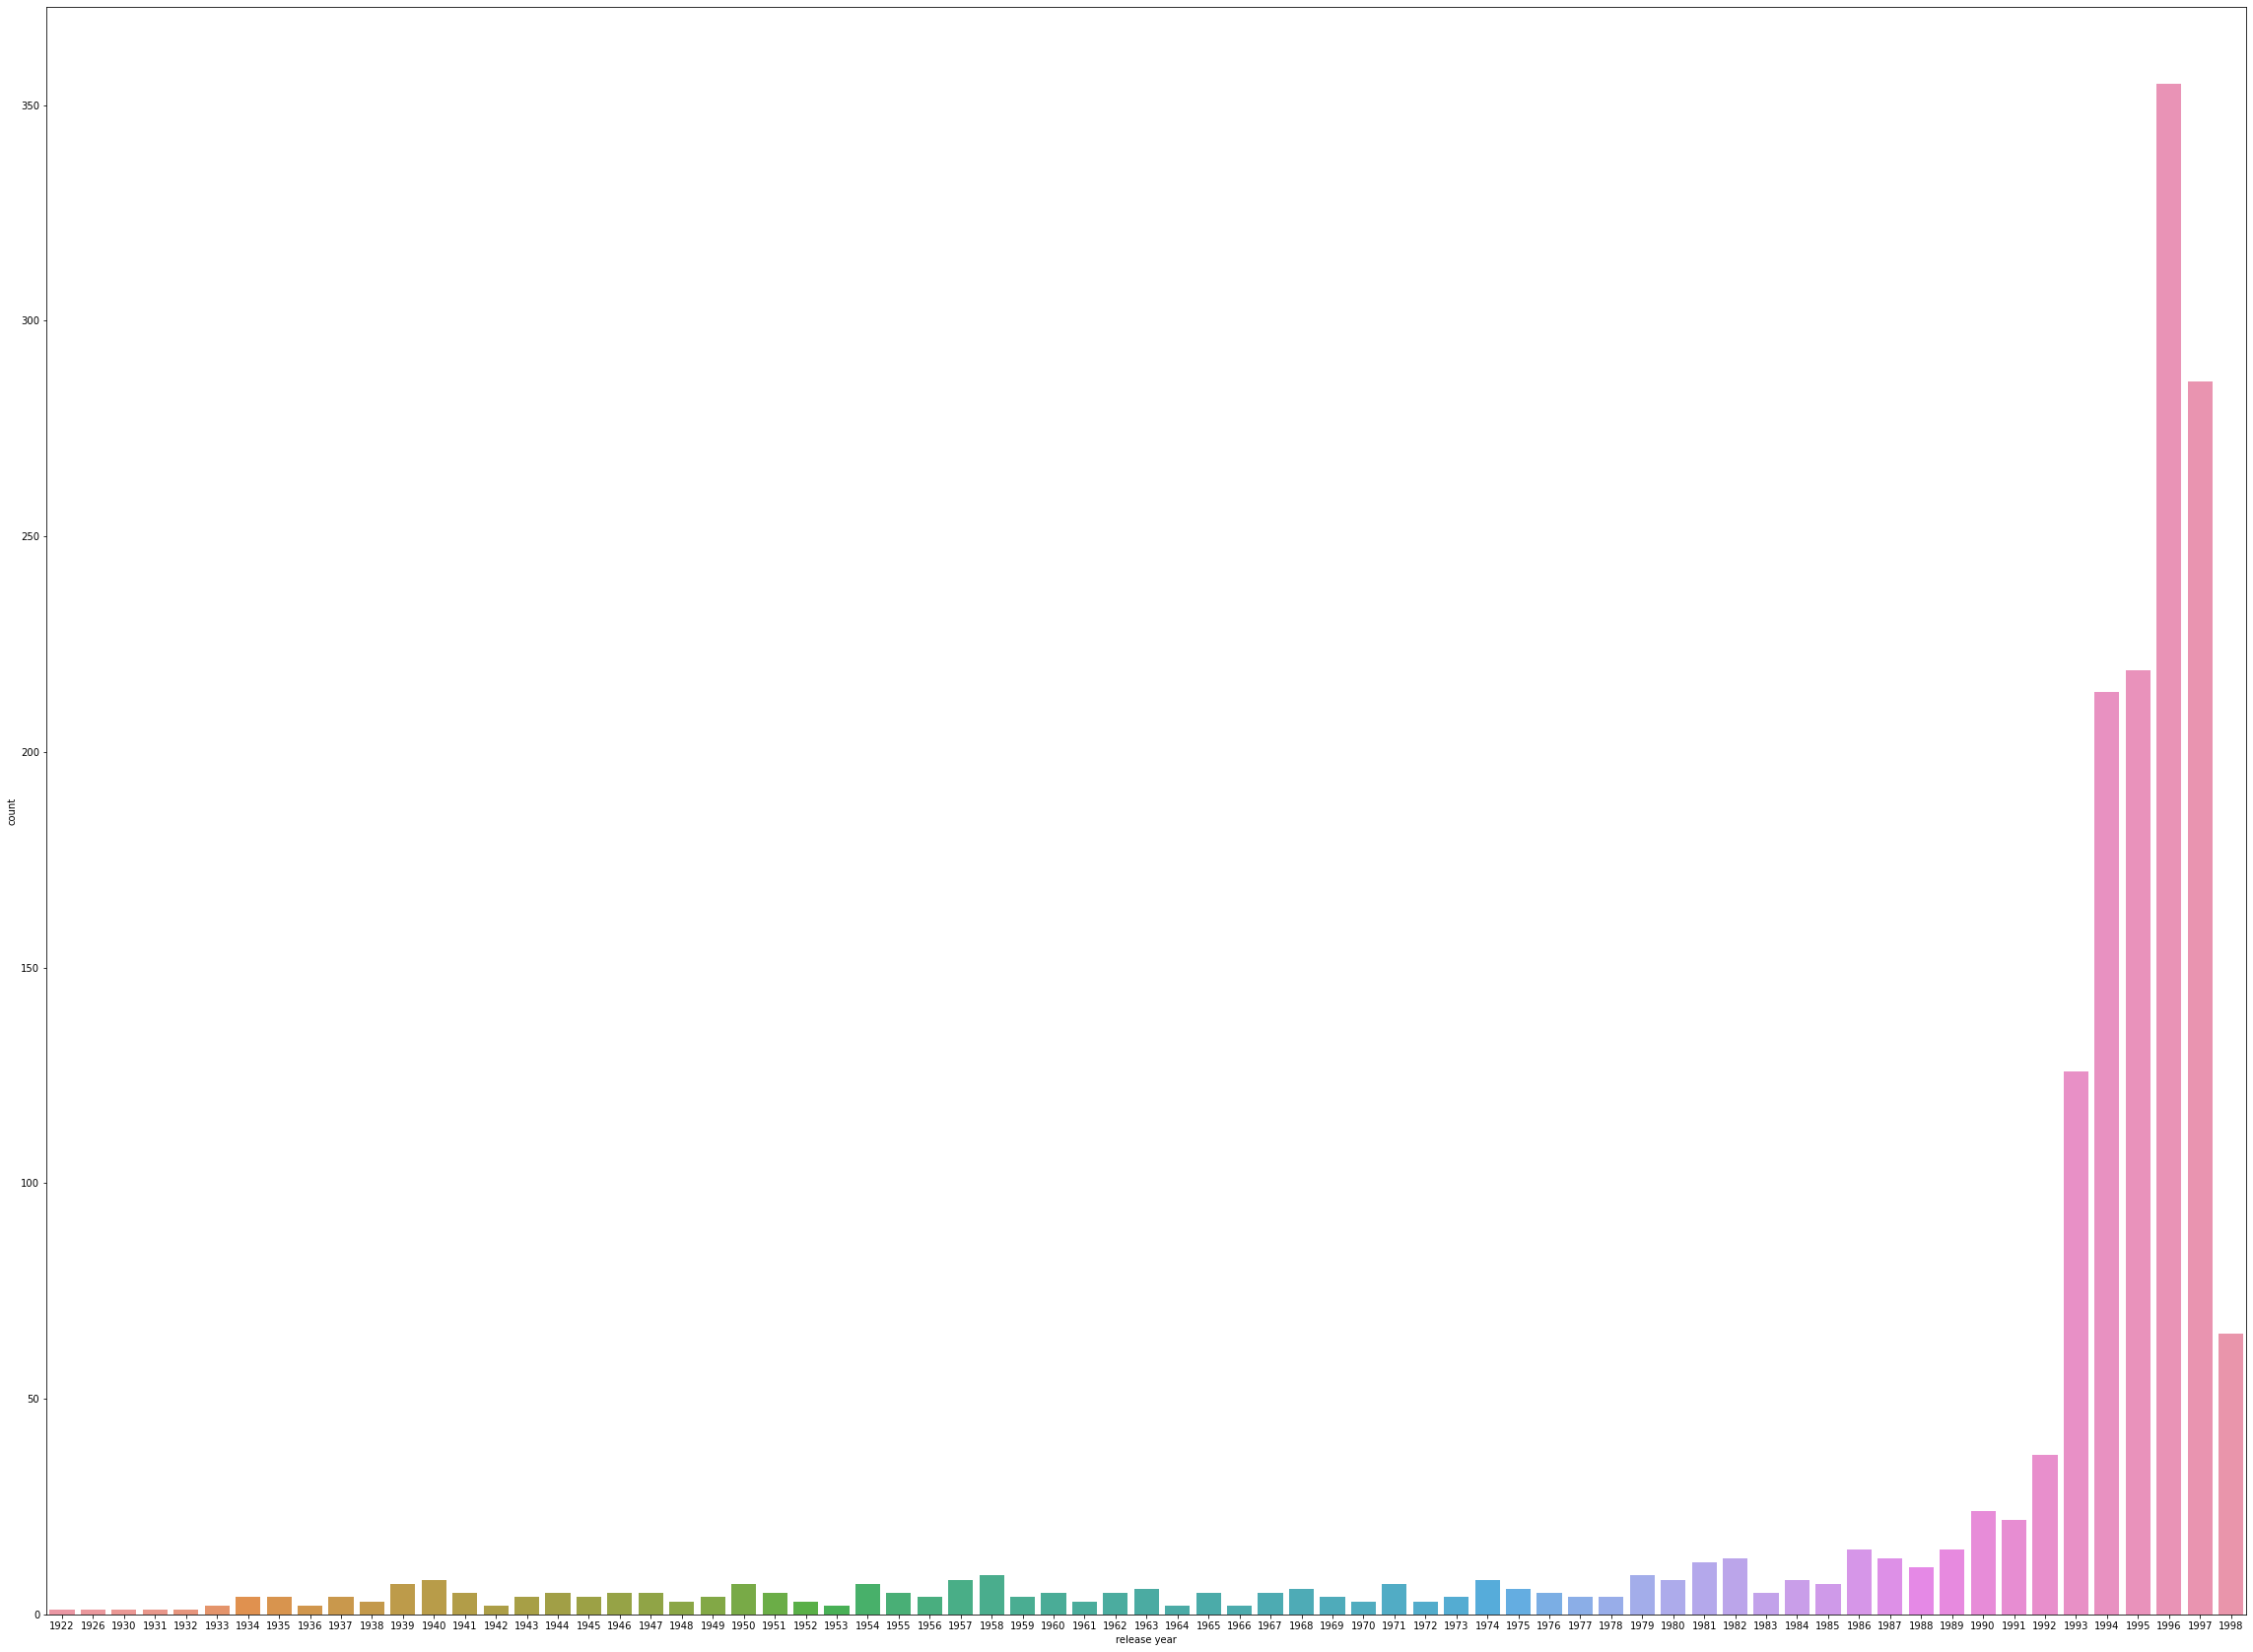

In [29]:
from matplotlib import pyplot
item_data['release year']= item_data['release date'].apply(pd.to_datetime).dt.year
plt.figure(figsize=(40,30))
item_data['release year'].value_counts(normalize=True)
sns.countplot(x='release year', data = item_data)
#results show that 1997 is the year with the highest percentage of releases

<AxesSubplot:xlabel='gender', ylabel='count'>

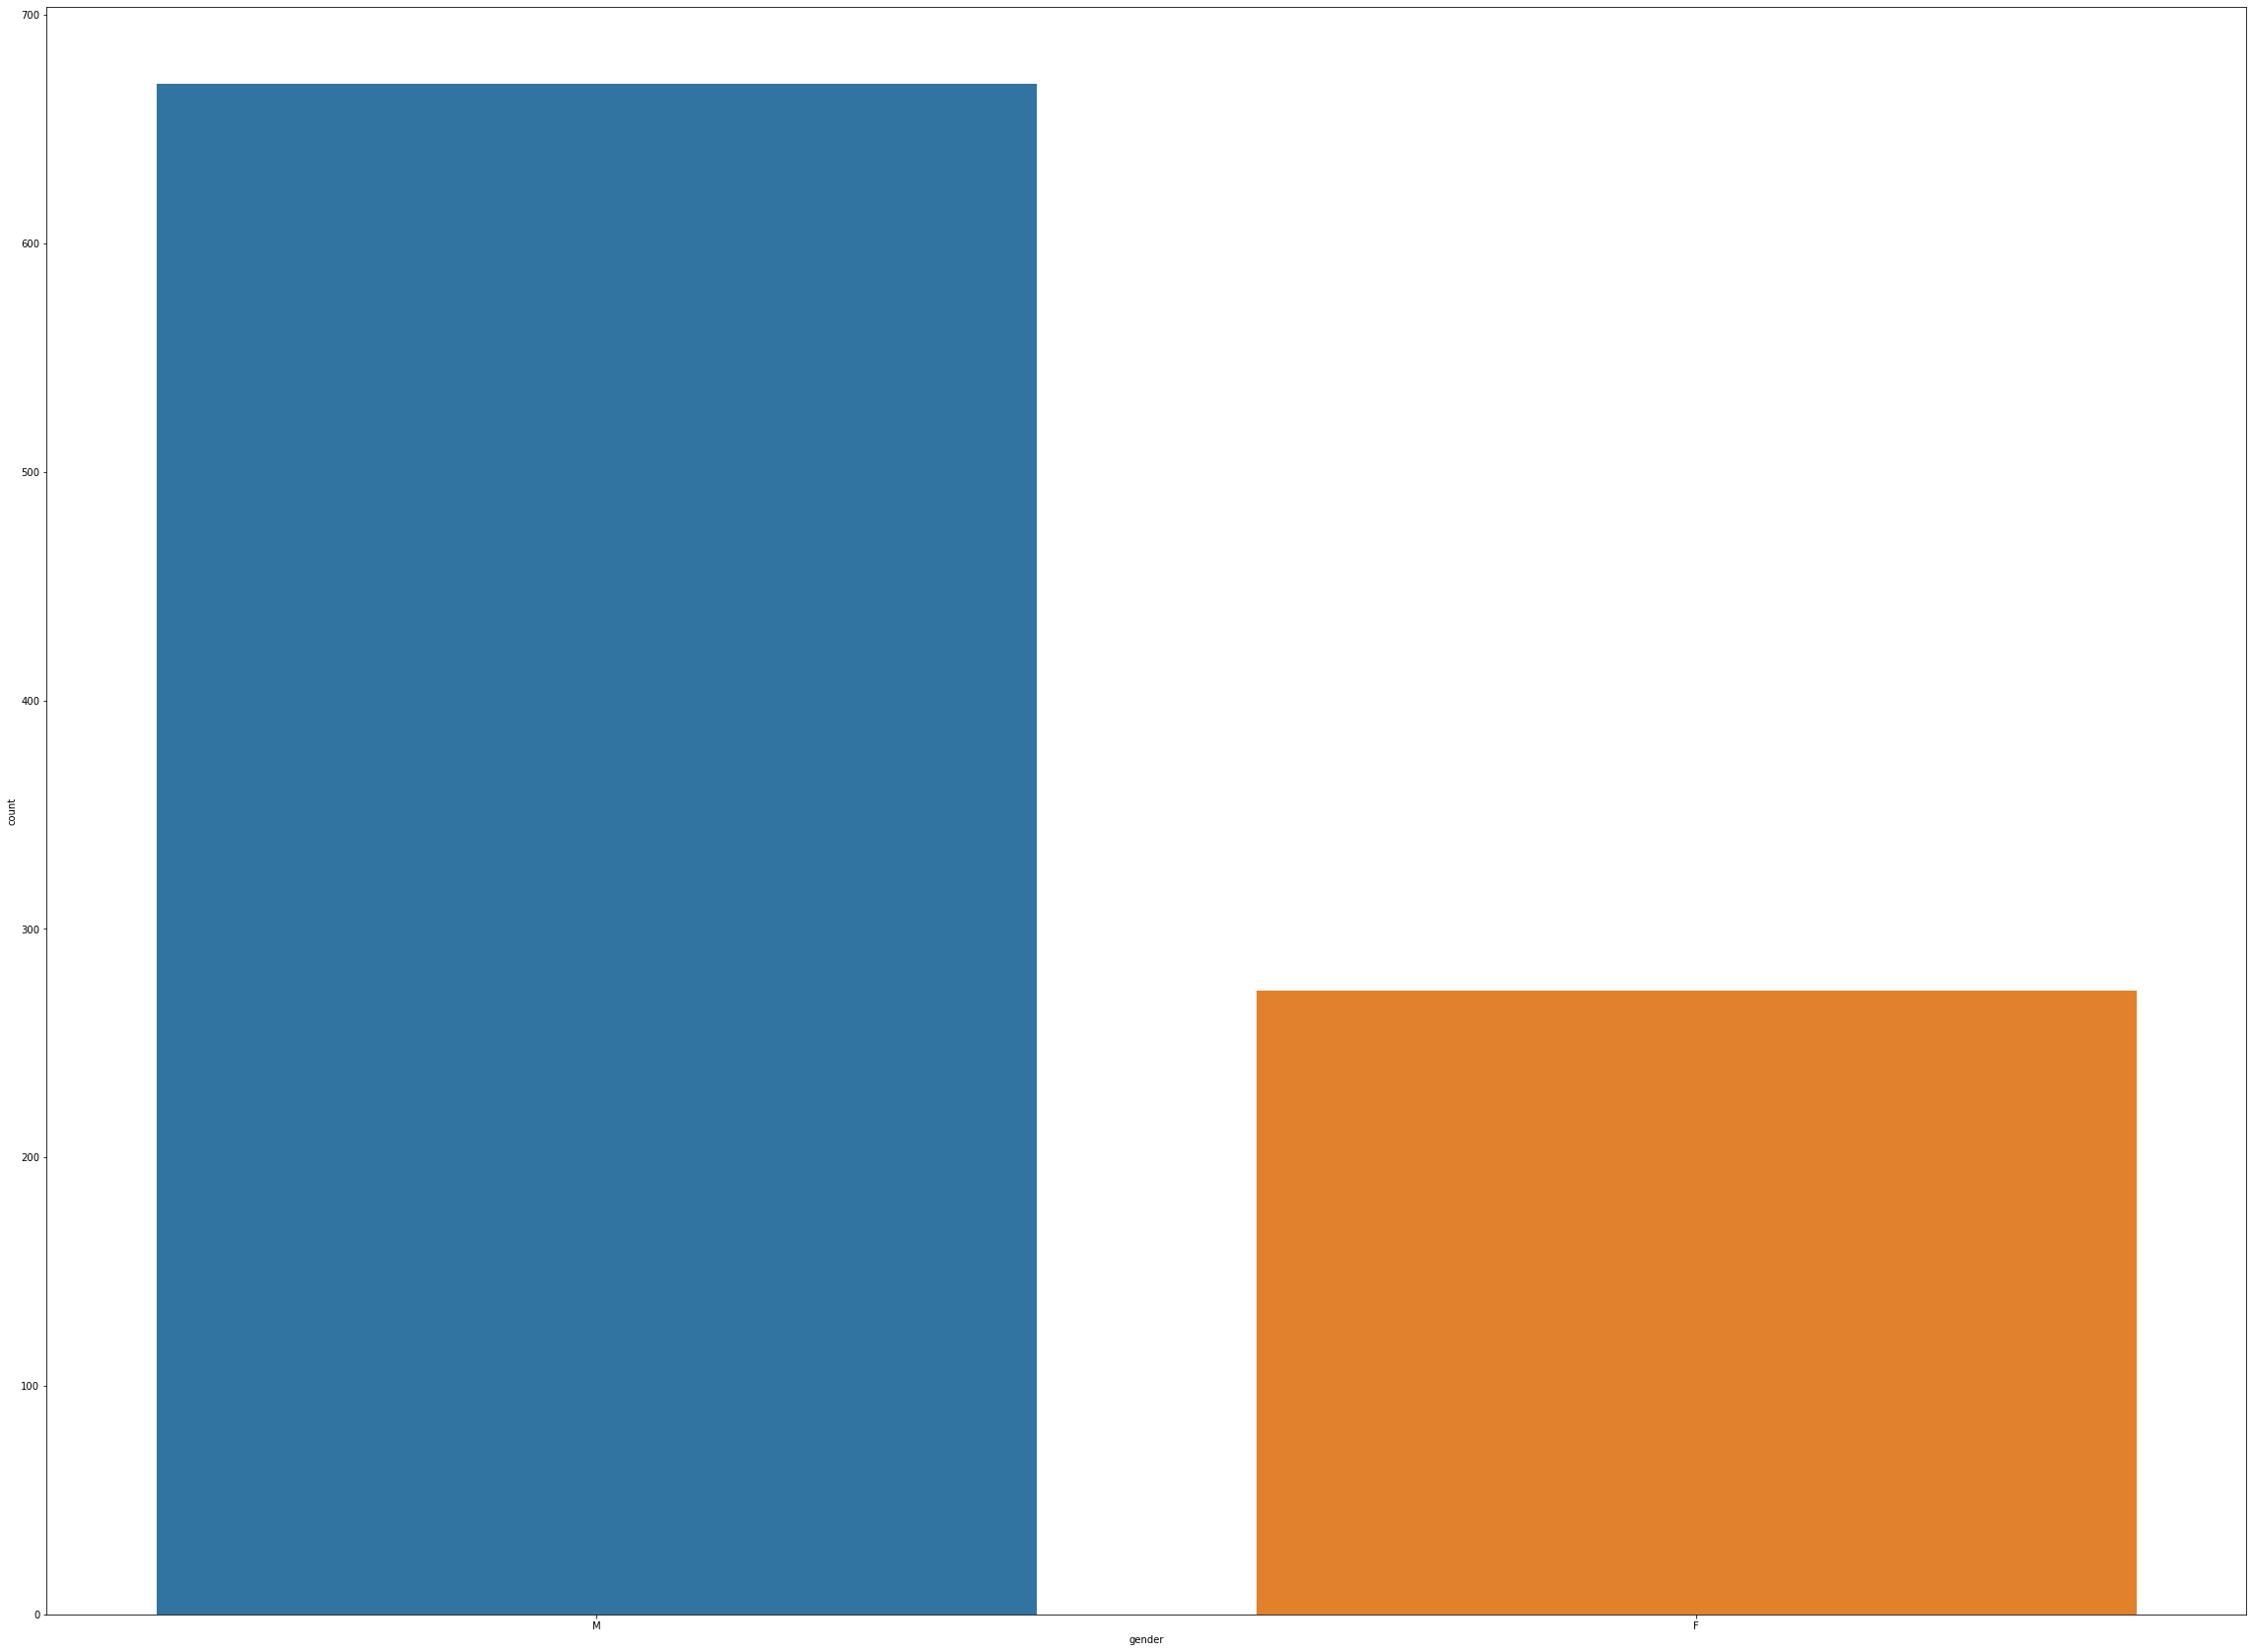

In [71]:
plt.figure(figsize=(40,30))
user_data['gender'].value_counts(normalize=True)
df = user_data['gender'].value_counts(normalize=True)*100
sns.countplot(x= 'gender', data=user_data)

<AxesSubplot:xlabel='occupation', ylabel='count'>

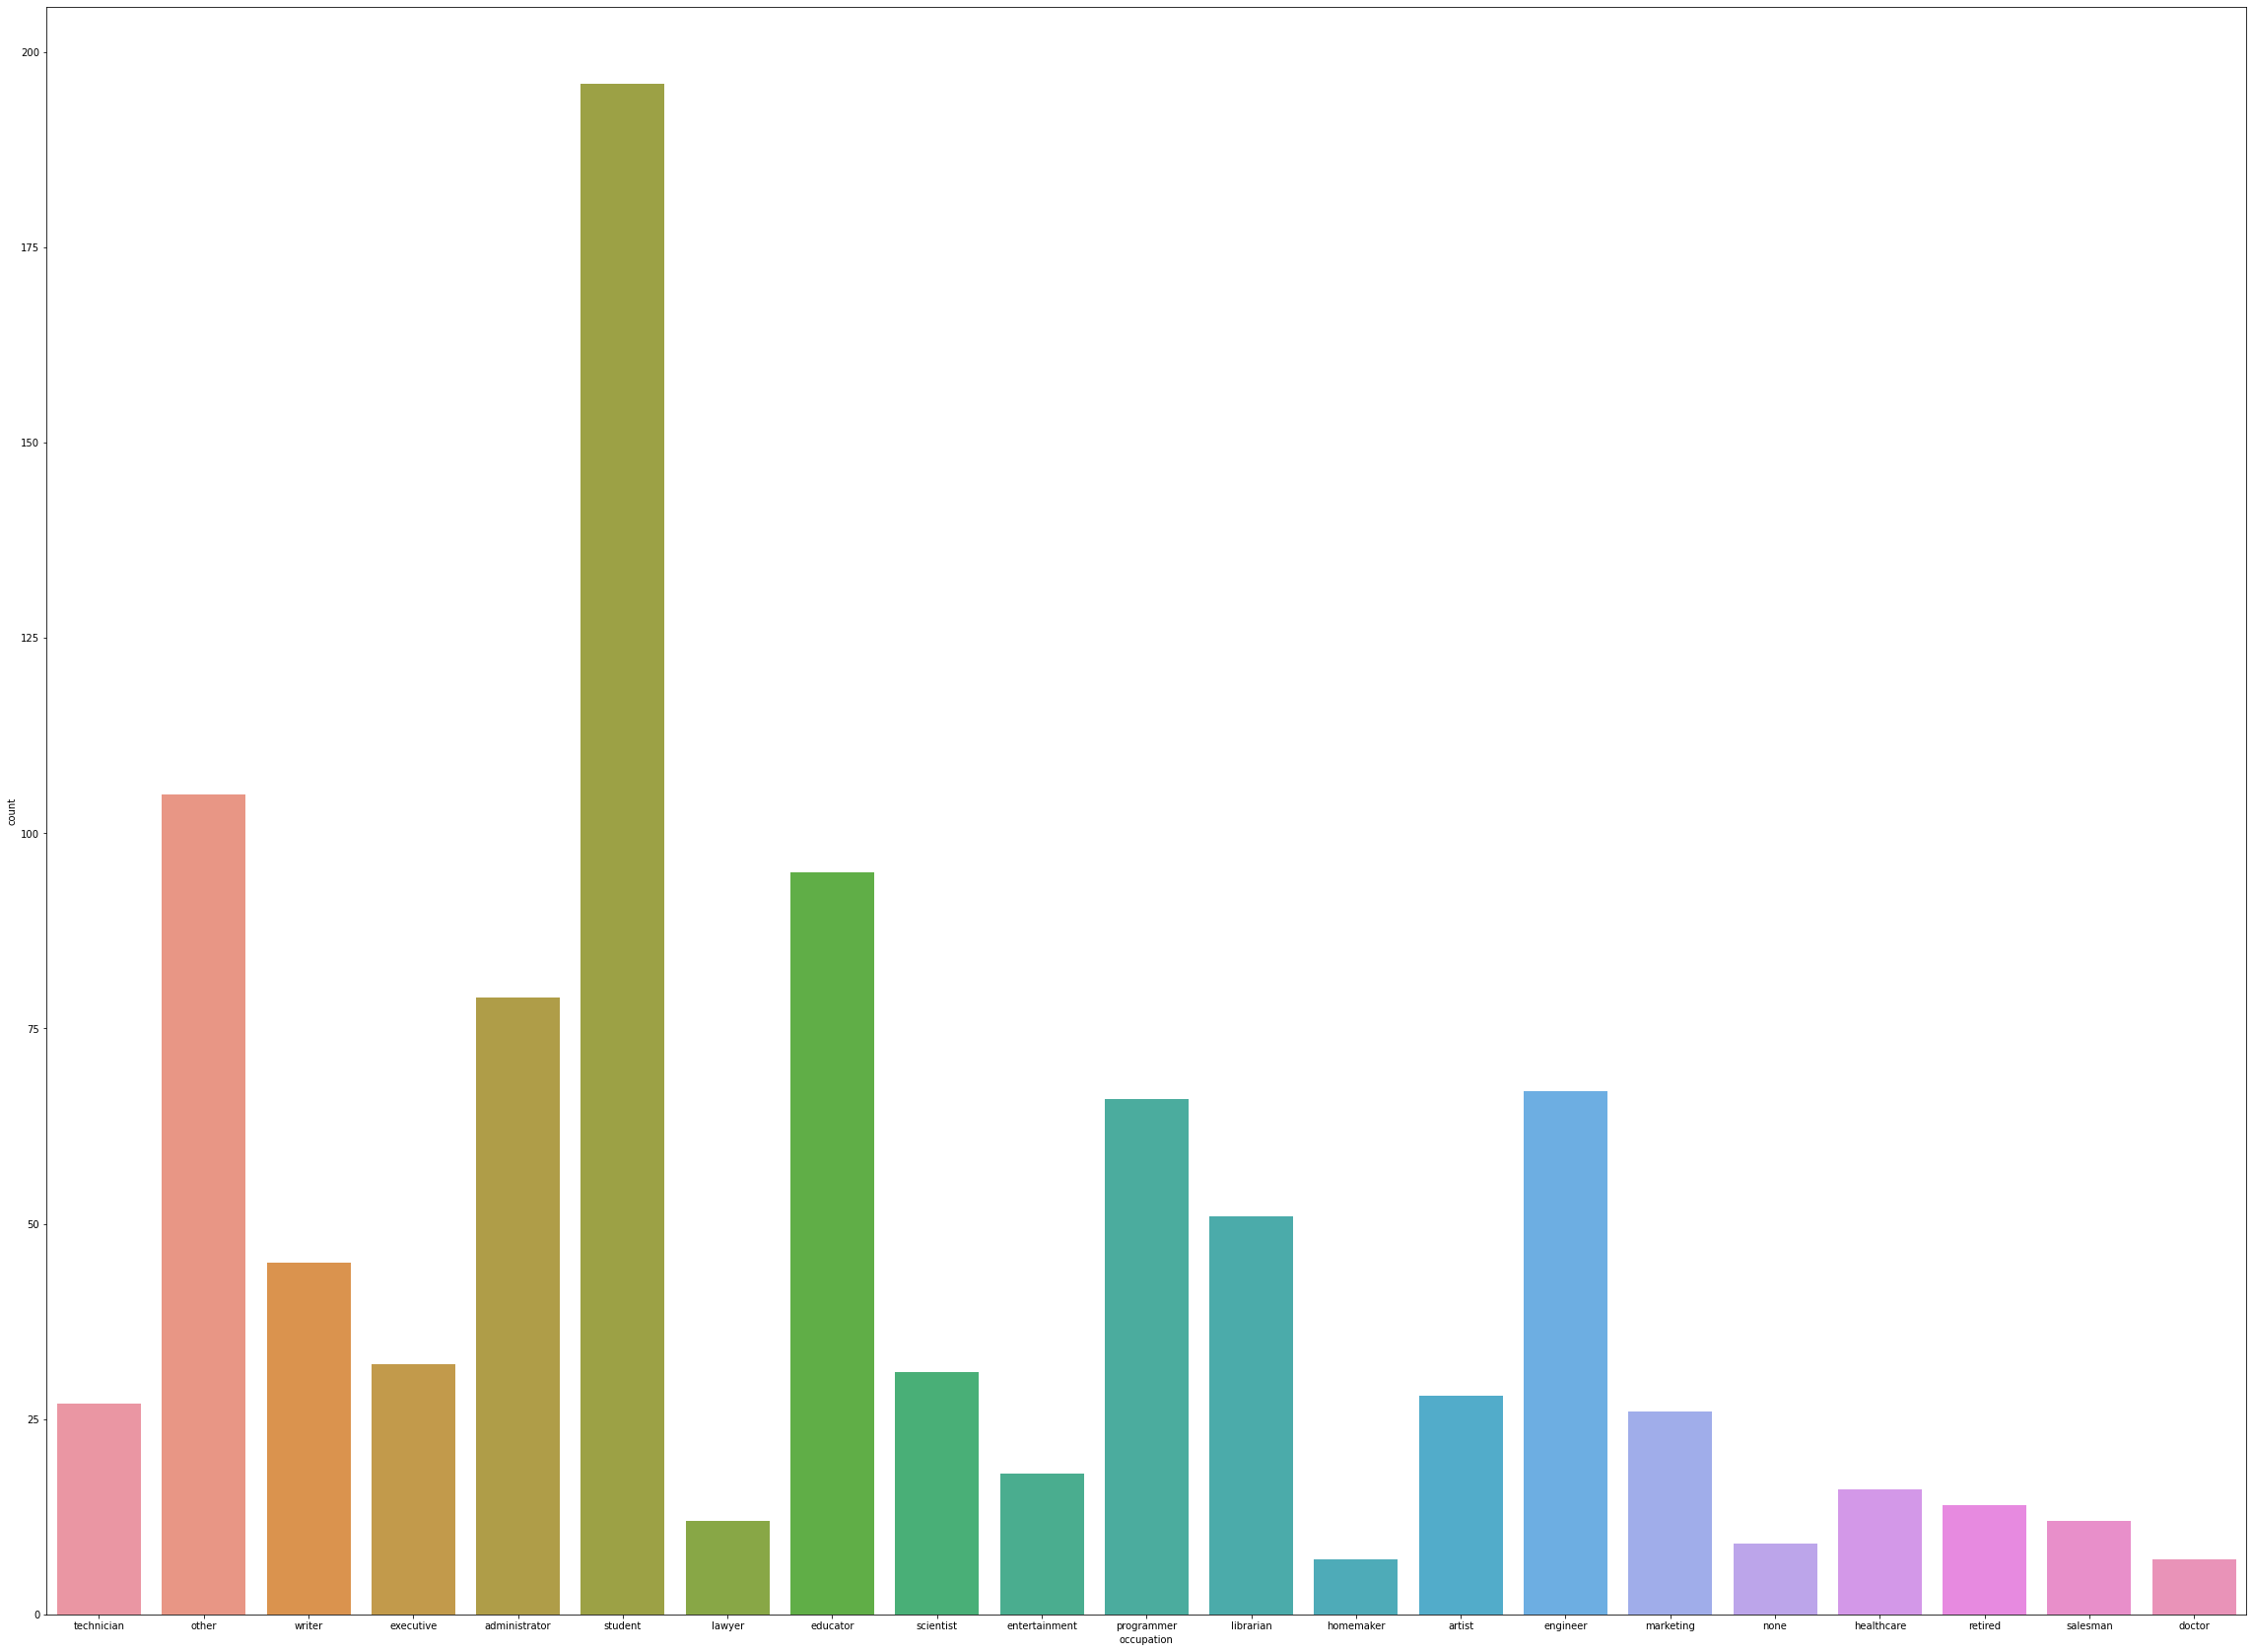

In [31]:
plt.figure(figsize=(40,30))
user_data['occupation'].value_counts(normalize=True)
sns.countplot(x='occupation',data=user_data)
#results show that student occupation is the highest occupation

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [72]:
df = item_data.groupby(["release date"], as_index= False)["unknown","Action","Adventure","Animation", "Childrens","Comedy","Crime", "Documentary",
                         "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"].sum()

In [73]:
df['release year']= df['release date'].apply(pd.to_datetime).dt.year
df2=df.set_index('release year')
df2.drop(df2.columns[[0,1]], axis = 1, inplace = True)
df2["Total"] = df2.sum(axis=1)

# iterate through each row and select
df3=(df2.div(df2['Total'], axis= 0) * 100)
df4=df3.reset_index()
df4.head()
df5 = df4.groupby(["release year"], as_index= False)["Action","Adventure","Animation", "Childrens","Comedy","Crime", "Documentary",
                         "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"].mean()
df5=df5.set_index('release year')
df5.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1926,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1931,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0
1932,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,0.000000,50.0,0.0


<AxesSubplot:ylabel='release year'>

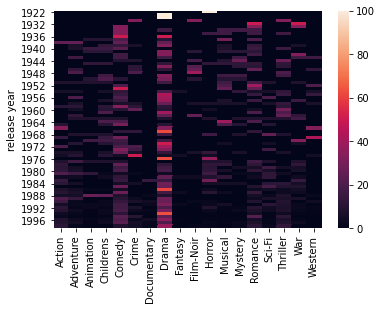

In [74]:
sns.heatmap(df5)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [75]:
movie_analyze = ratings_data.groupby('movie id').agg({'rating': [np.size, np.mean]})
minimum_100 = movie_analyze['rating']['size'] >= 100
movies_25=movie_analyze[minimum_100].sort_values([('rating', 'mean')], ascending=False)[:25]

In [76]:
df=pd.merge(movies_25, item_data, how='left', left_on=['movie id'], right_on=['movie id'])
print(df[['movie title', ('rating', 'mean')]])

                                          movie title  (rating, mean)
0                                     Close Shave, A         4.491071
1                                   Schindler's List         4.466443
2                                Wrong Trousers, The         4.466102
3                                         Casablanca         4.456790
4                          Shawshank Redemption, The         4.445230
5                                        Rear Window         4.387560
6                                Usual Suspects, The         4.385768
7                                          Star Wars         4.358491
8                                       12 Angry Men         4.344000
9                                       Citizen Kane         4.292929
10                             To Kill a Mockingbird         4.292237
11                   One Flew Over the Cuckoo's Nest         4.291667
12                         Silence of the Lambs, The         4.289744
13                  

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [77]:
#merge all the datasets
df = pd.merge(pd.merge(ratings_data, user_data),item_data)
df.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#pivot table
ratings_drama = df.pivot_table(values='rating',index = 'Drama',columns = 'gender', aggfunc='size')
ratings_drama.head()
#Men watch more drama than women?  Answer: No.The data suggests that Women appear to watch more drama than men (42.7% > 38.9%)

gender,F,M
Drama,,
0,14730,45366
1,11008,28887


In [79]:
ratings_SciFi = df.pivot_table(values='rating',index = 'Sci-Fi',columns = 'gender', aggfunc='size')
ratings_SciFi.head()
#Women watch more Sci-Fi than men? Answer: No. The data suggests that men watch more Sci-Fi than women (14% > 11%) 

gender,F,M
Sci-Fi,,
0,23109,64152
1,2629,10101


In [80]:
ratings_Romance = df.pivot_table(values='rating',index = 'Romance',columns = 'gender', aggfunc='size')
ratings_Romance.head()
#Men watch more Romance than women? Answer: No . The data suggests that women watch more Romance than men(22.7% > 18%)

gender,F,M
Romance,,
0,19880,60650
1,5858,13603
